In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares, differential_evolution, dual_annealing
from tabulate import tabulate
import urllib
import os
import random
import math
from tqdm import tqdm

## Stochastic and Metaheuristic Algorithms

In [2]:
def generate_noisy():
    
    x = []
    y = []

    def fx(x):        
        return 1/(x**2 - 3*x + 2)

    for k in range(1000):
        xk = 3*k/1000
        x.append(xk)
        fxk = fx(xk)
        delta = np.random.normal(0,1)

        if fxk < -100:            
            y.append(-100 + delta)
        elif fxk >= -100 and fxk <= 100:            
            y.append(fxk + delta)
        else:            
            y.append(100 + delta)
        
    return np.array(x), np.array(y)

def _rational(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def rational(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]
    return np.sum((_rational(x, a, b, c, d) - y)**2)

def rational_resid(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]

    return abs(_rational(x, a, b, c, d) - y)

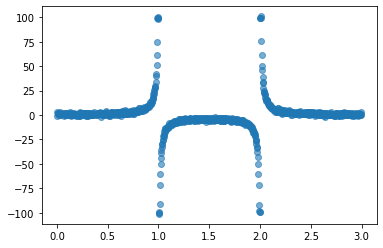

In [133]:
x,y = generate_noisy()
error = 0.001
init_point = [1,-1,-1,1]

plt.scatter(x, y, alpha=0.6)
plt.show()

### Nelder-Mead

In [134]:
nelder = minimize(rational, init_point, args=(x, y), method='nelder-mead', tol=error, options={'disp': True})
na, nb, nc, nd = nelder['x']
print(nelder['x'])

Optimization terminated successfully.
         Current function value: 255831.130474
         Iterations: 354
         Function evaluations: 604
[-0.21979133  0.42570874 -3.9527783   3.90626086]


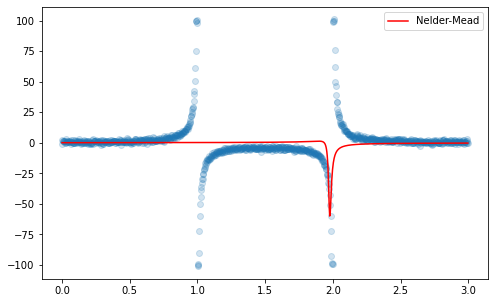

In [135]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, na, nb, nc, nd), label='Nelder-Mead', color='red')
plt.legend()
plt.show()

### Levenberg-Marquadt

In [136]:
levenberg = least_squares(rational_resid, init_point, args=(x, y), method='lm', xtol=error)
la, lb, lc, ld = levenberg['x']
print(f'Current function value: {levenberg["cost"]}')
print(f'Function Calls: {levenberg["nfev"]}')
print(levenberg['x'], end='\n\n')


Current function value: 67762.5702506394
Function Calls: 215
[-1.00078942  1.00127475 -2.00091492  1.00093118]



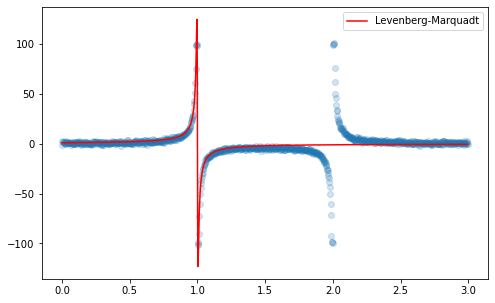

In [138]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, la, lb, lc, ld), label='Levenberg-Marquadt', color='red')
plt.legend()
plt.show()

### Differential Evolution

In [183]:
bounds = [(-7, 4), (-7, 4), (-7, 4), (-7, 4)]

In [184]:
evolution = differential_evolution(rational, bounds, args=(x, y), tol=error)
ea, eb, ec, ed = evolution['x']
print(evolution)

     fun: 135594.6701683382
     jac: array([ 506746.26290887,  253589.80210017, 1482774.09635581,
        167686.55434182])
 message: 'Optimization terminated successfully.'
    nfev: 11950
     nit: 197
 success: True
       x: array([ 0.99725179, -1.99400483, -3.99912239,  3.99826095])


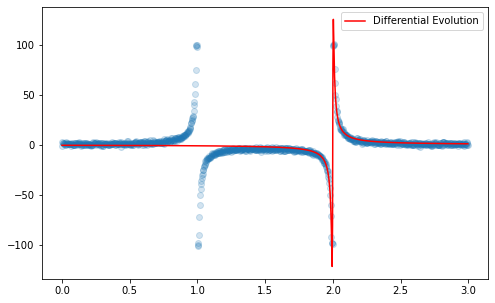

In [186]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, ea, eb, ec, ed), label='Differential Evolution', color='red')
plt.legend()
plt.show()

### Simulated Annealing

In [187]:
annealing = dual_annealing(rational, bounds, args=(x, y))
aa, ab, ac, ad = annealing['x']
print(annealing)

     fun: 135520.14159214305
 message: ['Maximum number of iteration reached']
    nfev: 8811
    nhev: 0
     nit: 1000
    njev: 162
  status: 0
 success: True
       x: array([-0.99965172,  1.00016052, -2.00100784,  1.00102409])


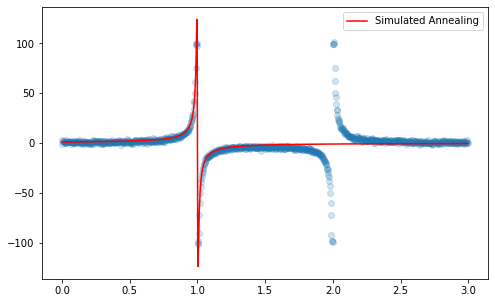

In [188]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.2)
plt.plot(x, _rational(x, aa, ab, ac, ad), label='Simulated Annealing', color='red')
plt.legend()
plt.show()

### Report Table

In [381]:
headers = ['a', 'b', 'c', 'd', 'Fx value', 'Iterations', 'Fx calls']
index = ['Differential Evolution', 'Simulated Annealing', 'Nelder-Mead', 'Levenberg-Marquadt']
table = [
    [ea, eb, ec, ed, evolution['fun'], evolution['nit'], evolution['nfev']],
    [aa, ab, ac, ad, annealing['fun'], annealing['nit'], annealing['nfev']],
    [na, nb, nc, nd, nelder['fun'], nelder['nit'], nelder['nfev']],    
    [la, lb, lc, ld, levenberg['cost'], levenberg['nfev'], levenberg['nfev']],
]

print('Table Comparison')
print(tabulate(table, headers=headers, showindex=index))

Table Comparison
                                a          b         c        d    Fx value    Iterations    Fx calls
----------------------  ---------  ---------  --------  -------  ----------  ------------  ----------
Differential Evolution   0.997252  -1.994     -3.99912  3.99826    135595             197       11950
Simulated Annealing     -0.999652   1.00016   -2.00101  1.00102    135520            1000        8811
Nelder-Mead             -0.219791   0.425709  -3.95278  3.90626    255831             354         604
Levenberg-Marquadt      -1.00079    1.00127   -2.00091  1.00093     67762.6           215         215


### Plot Comparison

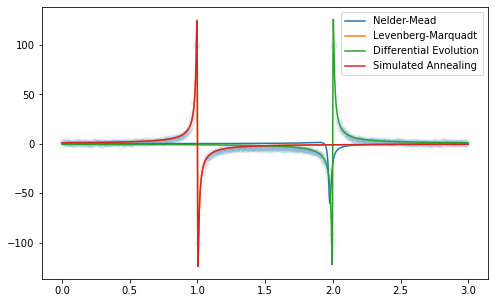

In [195]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.03)
plt.plot(x, _rational(x, na, nb, nc, nd), label='Nelder-Mead')
plt.plot(x, _rational(x, la, lb, lc, ld), label='Levenberg-Marquadt')
plt.plot(x, _rational(x, ea, eb, ec, ed), label='Differential Evolution')
plt.plot(x, _rational(x, aa, ab, ac, ad), label='Simulated Annealing')
plt.legend()
plt.show()

## Travelling Salesman Problem

In [363]:
file_dist = 'wg59_dist.txt'
file_coord = 'wg59_xy.txt'

if not os.path.exists(file_dist):
    urllib.request.urlretrieve('https://people.sc.fsu.edu/~jburkardt/datasets/cities/' + file_dist, file_dist)

if not os.path.exists(file_coord):
    urllib.request.urlretrieve('https://people.sc.fsu.edu/~jburkardt/datasets/cities/' + file_coord, file_coord)

In [364]:
with open(file_dist, 'r') as f:
    dist = f.readlines()

dist = np.loadtxt(dist)
dist

array([[  0., 146., 145., ...,  42., 101., 116.],
       [146.,   0.,  35., ..., 129., 106.,  45.],
       [145.,  35.,   0., ..., 119.,  81.,  29.],
       ...,
       [ 42., 129., 119., ...,   0.,  60.,  90.],
       [101., 106.,  81., ...,  60.,   0.,  60.],
       [116.,  45.,  29., ...,  90.,  60.,   0.]])

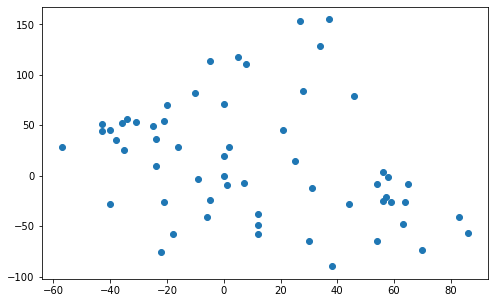

In [365]:
with open(file_coord, 'r') as c:
    coord = c.readlines()

coord = np.loadtxt(coord)

# plot coordinate
plt.figure(figsize=(8,5))
plt.scatter(coord[:,0], coord[:,1])
plt.show()

In [366]:
def sum_dist(tour, dist=dist):
    sum = 0
    for i in range(len(tour)-1):        
        sum += dist[tour[i]][tour[i+1]]

    # compute last city with first city distance
    sum += dist[tour[-1]][tour[0]]

    return sum

In [367]:
def simulate(coord, max_temp=100000):

    first_tour = []
    first_dist = 0
    first_iter = True


    n = len(coord)
    tour = random.sample(range(n), n)    

    for temp in tqdm(np.linspace(0.0001, 0.0005, max_temp)[::-1]):
        curr_dist = sum_dist(tour)
        
        # generate new tour
        i, j = sorted(random.sample(range(n), 2))    
        new_tour = tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_dist = sum_dist(new_tour)

        # save first iteration
        if first_iter:
            first_tour = new_tour.copy()
            first_dist = new_dist
            first_iter = False

        if (np.exp(curr_dist - new_dist) / temp) > random.random():
            tour = new_tour.copy()
    
    print('Simulation done.')
    print('----------------')
    print(f'First tour: {first_tour}')
    print(f'First distance: {first_dist}')
    print(f'Best tour: {tour}')
    print(f'Shortest distance: {sum_dist(tour)}')

    return first_tour, first_dist, tour, sum_dist(tour)

In [374]:
f_tour, f_dist, b_tour, b_dist = simulate(coord, 10000000)

100%|██████████| 10000000/10000000 [07:11<00:00, 23179.75it/s]

Simulation done.
----------------
First tour: [5, 48, 2, 47, 58, 32, 44, 54, 33, 56, 38, 7, 8, 17, 25, 49, 22, 52, 30, 15, 35, 20, 37, 43, 10, 29, 39, 1, 53, 19, 4, 14, 18, 31, 45, 9, 3, 12, 21, 42, 57, 6, 51, 50, 26, 46, 13, 23, 36, 24, 27, 16, 11, 55, 34, 0, 41, 28, 40]
First distance: 4888.0
Best tour: [11, 57, 6, 54, 12, 10, 27, 56, 28, 14, 20, 0, 50, 17, 25, 42, 23, 49, 31, 34, 18, 38, 33, 45, 29, 44, 58, 47, 35, 30, 16, 22, 2, 46, 40, 41, 5, 39, 48, 21, 55, 1, 24, 37, 3, 26, 51, 8, 9, 36, 13, 53, 7, 15, 19, 43, 32, 4, 52]
Shortest distance: 1109.0


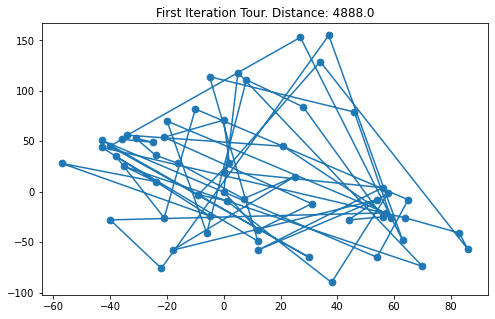

In [378]:
n = len(coord)

# plot first iteration
plt.figure(figsize=(8,5))
plt.title(f'First Iteration Tour. Distance: {f_dist}')
plt.scatter(coord[:,0], coord[:,1], s=45)
plt.plot([coord[f_tour[i % n]][0] for i in range(n+1)], [coord[f_tour[i % n]][1] for i in range(n+1)])
plt.show()

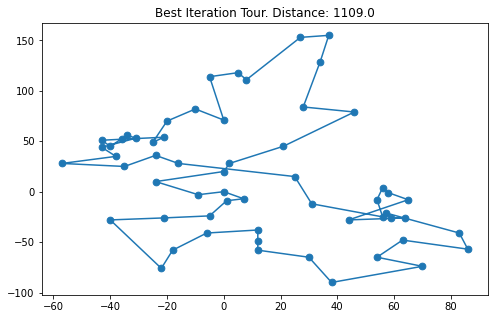

In [377]:
n = len(coord)

# plot first iteration
plt.figure(figsize=(8,5))
plt.title(f'Best Iteration Tour. Distance: {b_dist}')
plt.scatter(coord[:,0], coord[:,1], s=45)
plt.plot([coord[b_tour[i % n]][0] for i in range(n+1)], [coord[b_tour[i % n]][1] for i in range(n+1)])
plt.show()